## Dimensionality Reduction 
- Data Preprocessing technique used to reduce the number of input features (Dimensions) in a dataset while keeping as much important information as possible

### WHY?
- Reduces overfitting
- Improves the model performance
- Handles the curse of dimensionality
- Helps in data visualization

## 2 Main types 
### 1. Feature Selection 
- You keep the original Features, but remove unimportant ones
### 2. Feature Extraction
- Create new features by combining the existing ones

In [3]:
# Set up the env
!pip install pandas numpy scikit-learn matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Load the wine dataset
wine = load_wine()

In [11]:
# Create a dataframe
X = pd.DataFrame(wine.data, columns = wine.feature_names)
y = wine.target

In [12]:
print(X.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [13]:
print("Shape:", X.shape)

Shape: (178, 13)


# Goal
- Reduce the 13 -> 2 dimensions

In [14]:
# Standardize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Principal Component Analysis

In [15]:
from sklearn.decomposition import PCA

# Reduce dimension to 2
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X_scaled)

print("Original Shape:", X.shape)
print("Reduced Shape:", X_pca.shape)

Original Shape: (178, 13)
Reduced Shape: (178, 2)


# How much information did we keep?

In [16]:
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total variance retained: ", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.36198848 0.1920749 ]
Total variance retained:  0.5540633835693526


# Visualize the reduced data

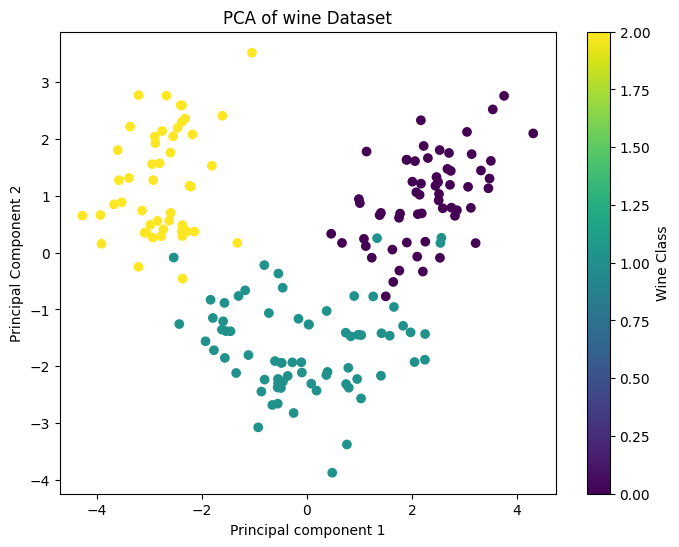

In [17]:
plt.figure(figsize = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel("Principal component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of wine Dataset")
plt.colorbar(label = "Wine Class")
plt.show()

# How many components do we really need?

In [18]:
pca_full = PCA()
pca_full.fit(X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

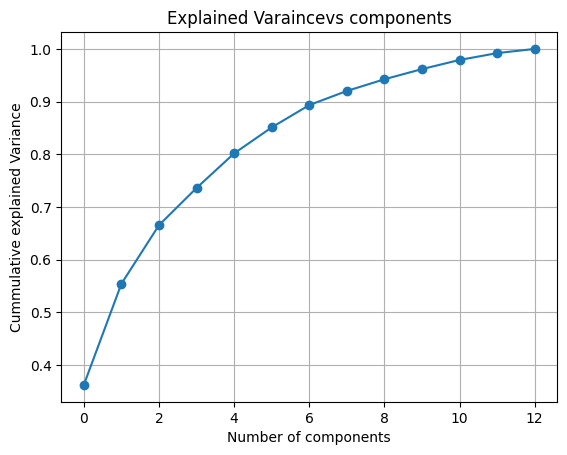

In [19]:
plt.plot(pca_full.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cummulative explained Variance")
plt.title("Explained Varaincevs components")
plt.grid()
plt.show()

# PCA + ML

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
pca = PCA(n_components = 6)
X_reduced = pca.fit_transform(X_scaled)

model = LogisticRegression(max_iter = 200)
model.fit(X_reduced, y)

print("Model trained with reduced dimensions")

Model trained with reduced dimensions


# Assignment - Task
- Research the Mathematics behind PCA and the intuition
- Compare PCA vs t-SNE vs UMAP (Make sure to have a visual intuition)
- Implement the PCA inside the sklearn pipeline
- Perform a dimensionality reduction for images - use food 101 images dataset: https://www.kaggle.com/datasets/kmader/food41
-Make commits to your GitHub branch in this dimensionality reduction

## Mathematics behind PCA and the intuition
- PCA reduces the number of features in the data while keeping the most important information.
- Finds direction where data varies the most (principal components)
- Projects data onto these directions
- Ignores less important directions

## Why use PCA?
- Reduces overfitting
- Speeds up training and improves performance
- Helps visualize data in 2D or 3D

## Intuition
- Imagine your data as a cloud of points.
- PCA finds the main direction where the points spread out the most, and then describes each point using fewer numbers while keeping most of the important points.

## Compare PCA vs t-SNE vs UMAP (Make sure to have a visual intuition)
### PCA
- Type: Linear
- Goal: Keep the directions where data varies the most
- Visual intuition: Imagine your data as a cloud of points. PCA finds the longest stretch of the cloud and flattens the cloud along that line.
- Uses: Good for compressing data, fast, preserves global structure

### t-SNE (t-Distributed Stochastic Neighbor Embedding)
- Type: Non-linear
- Goal: Keep local neighborhoods intact (points that are close stay close)
- Visual intuition: Imagine point connected with tiny springs. t-SNE pulls neighbors close together and pushes far points apart, forming clear clusters.
- Uses: Best for visualizing clusters in 2D or 3D, but slow, and distances between clusters may not mean much

### UMAP (Uniform Manifold Approximation and Projection)
- Type: Non-linear
- Goal: Preserve local structure like t-SNE, but also keep some global structure
- Visual intuition: Imagine building a network of neighbors and then stretching it flat while keeping connected points close.
- Uses: Faster than t-SNE, preserves clusters and overall structure, can also transform new data. 

### Implementing PCA inside a sklearn Pipeline

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [24]:
data = load_wine()
X = data.data
y = data.target

In [26]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=2)),
    ('clf', LogisticRegression ())
])

In [28]:
# Fit the pipeline on training data
pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('pca', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",2
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'fu

In [30]:
# Accuracy
accuracy = pipe.score(X_test, y_test)
print("Test accuracy:", accuracy)

Test accuracy: 1.0


### Dimensionality Reduction for Images

In [37]:
pip install torchvision scikit-learn matplotlib pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import torch
from torchvision import models, transforms
from PIL import Image
import os
import numpy as np

In [39]:
# Define image preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
# Extract features for images
def extract_features(img_path):
    img = Image.open(img_path).convert("RGB")
    x = transform(img).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        features = model(x)
    return features.numpy().flatten()

# List all images
image_paths = [os.path.join('food_images', f) for f in os.listdir('food_images') if f.endswith('.jpg')]

# Extract features
X = np.array([extract_features(p) for p in image_paths])
print("Shape of features:", X.shape)

In [ ]:
# List images
image_paths = [os.path.join('food_images', f) for f in os.listdir('food_images') if f.endswith('.jpg')]

In [ ]:
# Extract features
X = np.array([extract_features(p) for p in image_paths])
print("Shape of features:", X.shape)

In [41]:
# PCA for dimensionality reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [42]:
# Pipeline: scale + PCA
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [43]:
X_pca = pipe.fit_transform(X)
print("Shape after PCA:", X_pca.shape)

Shape after PCA: (178, 2)


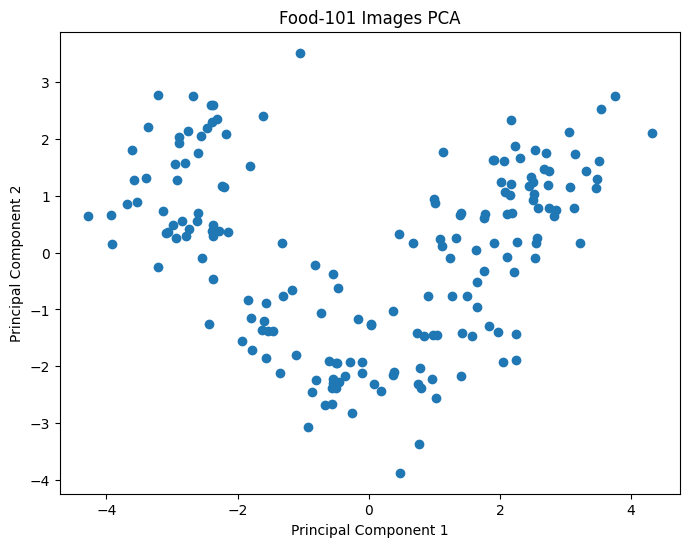

In [44]:
# Visualize the reduced images
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.title("Food-101 Images PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()